In [0]:
#!pip install cupy-cuda100

In [0]:
!pip install hdbscan

     |████████████████████████████████| 4.4MB 3.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.24-cp36-cp36m-linux_x86_64.whl size=2360660 sha256=23ebf2cfbdf8b92b6d0b7c00db952baba246ae72fb080990652e566298fe7244
  Stored in directory: /root/.cache/pip/wheels/6a/5a/ab/a3247c72fa70b67699d5f8be94bd0c2d3d38864825d773b9f1
Successfully built hdbscan


In [0]:
!pip install -U spacy

     |████████████████████████████████| 10.4MB 3.4MB/s 
     |████████████████████████████████| 122kB 37.8MB/s 
     |████████████████████████████████| 2.2MB 31.9MB/s 
     |████████████████████████████████| 3.7MB 29.2MB/s 
  Found existing installation: preshed 2.0.1
    Uninstalling preshed-2.0.1:
      Successfully uninstalled preshed-2.0.1
  Found existing installation: blis 0.2.4
    Uninstalling blis-0.2.4:
      Successfully uninstalled blis-0.2.4
  Found existing installation: thinc 7.0.8
    Uninstalling thinc-7.0.8:
      Successfully uninstalled thinc-7.0.8
  Found existing installation: spacy 2.1.9
    Uninstalling spacy-2.1.9:
      Successfully uninstalled spacy-2.1.9


In [0]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4MB 1.2MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp36-none-any.whl size=98051304 sha256=36c49b4431413df9ff095ca50c234394170d182f3a4018f0034c8f0d4d53840f
  Stored in directory: /tmp/pip-ephem-wheel-cache-pnxsoj1i/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [0]:
from google.colab import drive
drive.mount('/mntDrive')

Drive already mounted at /mntDrive; to attempt to forcibly remount, call drive.mount("/mntDrive", force_remount=True).


In [0]:
cd '/mntDrive/My Drive/'

/mntDrive/My Drive


In [0]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from hdbscan import HDBSCAN
import spacy
pd.options.display.max_colwidth = 500

In [0]:
%%time
data = pd.read_csv('proc_17_108_unique_comments_text_dupe_count.csv')
print(f"Loaded in {len(data)} entries aggregating {data['dupe_count'].sum()} total comments.")

Loaded in 2955186 entries aggregating 22078910.0 total comments.
CPU times: user 26.3 s, sys: 3.68 s, total: 30 s
Wall time: 53.2 s


In [0]:
'''import spacy
gpu = spacy.prefer_gpu()
print('GPU:', gpu)'''

"import spacy\ngpu = spacy.prefer_gpu()\nprint('GPU:', gpu)"

In [0]:
data

,docid,text_data,dupe_count
0,2,"I work as an engineering manager at a small video streaming video start up, and the last thing we need is to pay additional tolls in order to get our content to our users. Reversing net neutrality rules would put our company at a disadvantage when competing against entrenched companies like Amazon or Netflix, let alone competing against the companies that sell internet access to our end users, like Comcast, Time Warner, or Verizon.\n\nIn order to have a vibrant, free, and innovative internet...",1.0
1,3,"Dear FCC,\r\n\r\nclowns. traitors. pawns pretenders. so many people laugh at you\r\nanthony mazza",1.0
2,5,"I am AGAINST the push to remove net neutrality laws. Keeping the internet neutral has propelled the american economy to new heights in the last few decades. By stripping net neutrality laws we will be handing over control of the internet to the already entrenched companies, preventing new entities from ever joining the market. Once we do this companies will leave America to find internet ecosystems that are more fair and accessible to them. The high-tech economy that America has so enjoyed w...",1.0
3,6,"Guys, I seriously don't understand your reasoning here. By killing net neutrality, you're basically giving ISPs the right to decide what I can see on the internet. What are we going to do if all of a sudden Comcast or Verizon decides that they want to charge Republican-leaning websites more than liberal ones? Or if, say, Burger King gives them some large amount of money to slow down McDonald's websites? The possibilities for abuse are endless, especially given the pretty fishy business pract...",1.0
4,8,"I do not support this proposal. Having a neutral internet enshrined in federal law is the only way to stop the abusive ISPs we have in this country from destroying the internet. Every other developed country has enshrined strong net neutrality laws, even Canada passed even strong laws just a few weeks ago. The united states should lead here, not give into industry demands at the expense of consumers. Please do your job and protect consumers, don't give these huge monopoly companies an ev...",1.0
...,...,...,...
2955181,22104153,I would like to implore the FCC to protect the ability of everyone to continue with free navigation of the internet. The scrapping of Net Neutrality rules will irrevocably destroy the many wonderful things which the modern internet has grown to be. ISPs and Cable companies are not known to treat fairly and protect the rights of the people. That duty falls to the FCC who we need to hold these companies accountable. Thank you.,1.0
2955182,22104155,My family and I request that you please keep net neutrality. The consequences of changing that will be disastrous.,1.0
2955183,22104156,You must preserve internet neutrality. No new businesses will be able to grow or new innovations flourish if providers can choose to snuff them out.,1.0
2955184,22104157,Internet service providers should treat all traffic that travels over their networks equally.,1.0


In [0]:
import en_core_web_md
nlp=None
nlp=en_core_web_md.load()
#nlp=spacy.load('en_core_web_md')

In [0]:
#take a sample to vectorize and cluster with dbscan
sample_size = 10000 # can play with this - starts to get unmanageable on my desktop @ sample_size > 100000
data_sample = data.sample(sample_size, random_state=42)

In [0]:
data_sample

,docid,text_data,dupe_count
998601,2924003,"Dear Mr. Pai, I am concerned about Internet regulation and net neutrality. I'd like to advocate the commissioners to repeal Obama's decision to regulate Internet access. Internet users, rather than Washington, should purchase the applications we choose. Obama's decision to regulate Internet access is a betrayal of the open Internet. It undid a free-market system that functioned very successfully for a long time with bipartisan approval.",1.0
1912233,7552643,"The FCC's Open Internet Rules (net neutrality rules) are extremely important to me. I urge you to protect them.\r\n\r\nI don't want ISPs to have the power to block websites, slow them down, give some sites an advantage over others, or split the Internet into ""fast lanes"" for companies that pay and ""slow lanes"" for the rest.\r\n\r\nNow is not the time to let giant ISPs censor what we see and do online.\r\n\r\nCensorship by ISPs is a serious problem. Comcast has throttled Netflix, AT&T blocked...",1.0
2219199,8125642,"Internet access is not simply the modern day equivalent of a 20th century utility service such as electricity and gas. It has the added dimension of being a vehicle for public speech and communication. As such, it is vital to our democracy that this platform be available TO ALL without discriminating against some voices.",1.0
1852824,7373582,"The FCC's Open Internet Rules (net neutrality rules) are extremely important to me. I urge you to protect them.\n\nI don't want ISPs to have the power to block websites, slow them down, give some sites an advantage over others, or split the Internet into ""fast lanes"" for companies that pay and ""slow lanes"" for the rest.\n\nNow is not the time to let giant ISPs censor what we see and do online.\n\nCensorship by ISPs is a serious problem. Comcast has throttled Netflix, AT&T blocked FaceTime, T...",1.0
284824,600864,"Do not let corporations benefit at the expense of citizens. Net neutrality is crucial to free and fair flow of information, empowering citizens worldwide. It is not fair for corporations to have an advantage that hurts private citizens.",1.0
...,...,...,...
1639752,5004188,Do not allow the internet to be destroyed. FREEDOM means we are able to communicate with each other. Do not allow them to silence the internet.,1.0
2473884,10163918,"The FCC's Open Internet Rules (net neutrality rules) are extremely important to me. I urge you to protect them.\n\nI don't want ISPs to have the power to block websites, slow them down, give some sites an advantage over others, or split the Internet into ""fast lanes"" for companies that pay and ""slow lanes"" for the rest.\n\nNow is not the time to let giant ISPs censor what we see and do online.\n\nCensorship by ISPs is a serious problem. Comcast has throttled Netflix, AT&T blocked FaceTime, T...",1.0
1465747,4063573,"I'm concerned about net neutrality and Title II. I would like to urge Chairman Pai to undo Barack Obama's order to control Internet access. Citizens, not so-called experts, ought to purchase whatever services we want. Barack Obama's order to control Internet access is a distortion of the open Internet. It reversed a free-market approach that performed supremely well for a long time with both parties' consensus.",2.0
2803437,10951792,"The FCC's Open Internet Rules (net neutrality rules) are extremely important to me. I urge you to protect them.\n\nI don't want ISPs to have the power to block websites, slow them down, give some sites an advantage over others, or split the Internet into ""fast lanes"" for companies that pay and ""slow lanes"" for the rest.\n\nNow is not the time to let giant ISPs censor what we see and do online.\n\nCensorship by ISPs is a serious problem. Comcast has throttled Netflix, AT&T blocked FaceTime, T...",1.0


In [0]:
print(nlp('internet').vector)

[-5.0955e-01  8.8231e-02 -3.2273e-01 -4.0398e-01  3.9159e-03  2.8101e-01
  3.5090e-01 -6.6318e-01  6.0733e-01  1.9826e+00 -5.6790e-01 -2.6366e-01
 -4.7594e-01  2.3901e-01  1.2855e-01 -9.4950e-02 -5.5889e-01  1.7264e+00
  1.4085e-01 -1.4170e-01  7.6534e-02  2.8138e-02 -5.4665e-01 -7.1647e-03
  4.1332e-01 -4.9836e-01 -2.1250e-01 -5.4104e-02 -6.6236e-02  3.8070e-01
  5.2971e-01  1.0665e-01 -2.2509e-04  2.7157e-01 -2.9910e-01 -5.8449e-01
 -2.7930e-01  1.9421e-01 -2.5975e-01  2.2838e-01 -3.9400e-01  1.6074e-01
  1.6796e-01 -1.9254e-01 -3.0569e-01  5.6040e-01 -1.1881e-01  8.1646e-03
  2.9081e-01 -1.6589e-01 -2.2682e-01  1.3991e-01 -2.8088e-01 -9.6784e-02
  8.2335e-04 -2.7992e-01  2.2853e-01 -8.1638e-01  2.2005e-01 -8.3126e-03
  3.0415e-01  2.8560e-01  4.8055e-01 -1.5591e-01  5.0138e-01  1.0735e-01
  3.5888e-01 -3.3791e-02  1.2382e-01 -2.3495e-01  2.0408e-01 -2.3375e-03
  5.4987e-01 -4.8327e-01 -5.2599e-01 -5.2087e-02  1.2164e-01  2.3318e-02
  1.3049e-02  1.0862e+00  1.6053e-01 -2.3047e-01  4

In [0]:
def encode_doc_vecs(docs):
    #encode mean word vector per document - might take a while
    #it took about 10s per 10,000 documents on my desktop
    #would want to parallelize this for a large enough job
    doc_vecs = []
    for doc in docs:
        #encode the doc if it is a string
        if type(doc) == str:
            doc_spaced = nlp(doc)
            
            doc_vec = doc_spaced.vector
            #in case the doc vector could not be encoded, e.g., empty string, no words found
            if type(doc_vec) != np.ndarray or doc_vec.shape[0] != 300:
                doc_vec = np.zeros(300)
        else:
            doc_vec = np.zeros(300)
        doc_vecs.append(doc_vec)
    return doc_vecs

In [0]:
%%time
doc_vecs = encode_doc_vecs(data_sample['text_data'])

CPU times: user 6min 15s, sys: 7.03 s, total: 6min 22s
Wall time: 6min 23s


In [0]:
doc_vecs[0]

array([-2.75979638e-02,  1.41033083e-01, -1.06925592e-01, -1.72214396e-02,
        2.86044856e-03,  4.40958925e-02,  8.34469497e-02, -1.74184918e-01,
        4.75753024e-02,  2.11096048e+00, -2.73232430e-01, -2.36281147e-03,
        4.52142209e-02, -9.39971954e-03, -1.47602797e-01, -6.30999506e-02,
       -1.55185476e-01,  1.19225669e+00, -9.74841639e-02,  2.24132519e-02,
        1.86843723e-02, -1.77513044e-02, -4.33266424e-02, -6.44447580e-02,
        5.99624701e-02,  2.27675624e-02, -1.07598171e-01, -2.74555199e-02,
        4.66155931e-02, -2.04114504e-02, -2.91032493e-02,  5.15996516e-02,
       -1.71540435e-02,  6.11500069e-02,  6.58747405e-02, -1.63397834e-01,
        3.67011242e-02,  5.57388552e-02, -1.02599882e-01, -7.43432492e-02,
       -2.03164406e-02,  6.18641004e-02,  8.33070725e-02, -1.00351021e-01,
       -3.99898626e-02,  8.28780383e-02, -1.11997642e-01, -1.67291611e-02,
       -7.78612355e-03, -7.01652467e-03, -8.43379274e-02,  6.23419285e-02,
       -4.54593860e-02, -

In [0]:
#use the euclidean distance of the l2-normalized vectors (angular distance), which is proportional to the cosine distance
norm_doc_vecs = normalize(doc_vecs, norm='l2')

In [0]:
clusterer = HDBSCAN(min_cluster_size=5)

In [0]:
# visualize silhouette scores (without outliers)
# our goal is to find the largest, densest clusters from which to manually pick out signature strings
from sklearn.metrics import silhouette_samples, silhouette_score

In [0]:
%%time
labels = clusterer.fit_predict(norm_doc_vecs)

CPU times: user 52.1 s, sys: 157 ms, total: 52.2 s
Wall time: 52.2 s


In [0]:
X_clustered = pd.concat([pd.Series(data=labels, name='cluster'),data_sample.reset_index(drop=True),pd.DataFrame(doc_vecs)], axis=1)
# take a quick peek
X_clustered.sample(100)

,cluster,docid,text_data,dupe_count,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
973,9,3368945,"To the FCC: My comments re: Net Neutrality and Title II. I urge the commission to repeal The Obama/Wheeler power grab to regulate the Internet. Individuals, not so-called experts, ought to buy the products we choose. The Obama/Wheeler power grab to regulate the Internet is a betrayal of net neutrality. It ended a free-market policy that worked very well for two decades with broad bipartisan backing.",1.0,-0.019279,0.114472,-0.077915,0.009774,0.017343,0.018262,0.022797,-0.079731,0.008479,1.964914,-0.247184,-0.007345,0.070805,-0.007315,-0.128773,-0.079809,-0.110536,1.127486,-0.098962,0.030727,0.037895,0.008526,0.005413,-0.048419,0.006505,0.040087,-0.106050,-0.024948,-0.028155,-0.011227,-0.000168,0.075276,-0.063936,0.112587,0.125769,-0.118034,...,0.042919,0.178814,0.047839,0.105919,0.075196,-0.243587,-0.031401,-0.005831,0.403883,0.016031,0.115045,0.012639,-0.038502,0.006553,0.028334,0.040991,0.011896,0.115059,0.055529,0.113141,0.107830,-0.001583,0.087290,0.064783,-0.044647,-0.029948,0.072732,-0.031786,0.175361,0.001676,-0.160230,0.033893,0.032864,-0.073756,-0.007409,0.024212,0.088027,-0.093874,0.026990,0.144379
4047,-1,194325,Please keep net neutrality under Title II. We cannot trust the cable companies to regulate themselves.,1.0,-0.032152,0.058303,-0.207955,-0.105569,-0.030228,-0.051610,0.013222,-0.136898,-0.009404,2.109609,-0.308472,0.097097,0.171003,0.041222,-0.088751,-0.062417,0.039062,1.230061,-0.196640,0.079166,0.175669,0.037405,-0.009206,0.032770,0.027562,0.044217,-0.249956,-0.098421,0.062724,-0.006235,-0.091827,0.030424,-0.123689,0.113403,0.058578,-0.114333,...,0.100388,0.259518,0.096536,0.159334,0.069858,-0.242011,-0.077439,0.077186,0.592971,0.039936,0.193877,0.031932,0.015280,0.038364,0.016389,0.041913,0.000465,0.106728,0.032434,0.079998,0.123167,-0.045930,0.073449,0.104180,-0.113910,-0.021250,0.016509,-0.018035,0.269438,-0.006993,-0.272593,-0.028303,-0.099326,-0.168152,0.048159,-0.055020,0.005189,-0.092091,0.103968,0.088372
6428,21,8029118,"The FCC needs to stand up for Internet users like me and keep the net neutrality rules that are already in effect. \r\n\r\nThe FCC should throw out Chairman Ajit Pai’s plan to give the telecom giants like Verizon, AT&T, and Comcast the legal cover to throttle whatever they please, stripping Internet users of the meaningful access and privacy safeguards we fought for and won just two years ago. \r\n\r\nI’m afraid of a “pay-to-play” Internet where ISPs can charge more for certain websites beca...",1.0,-0.056755,0.137805,-0.166595,-0.067985,0.039582,0.008880,0.047364,-0.099339,0.018961,2.116762,-0.205692,0.026926,0.050780,0.033388,-0.102629,-0.062305,-0.090112,1.136594,-0.153467,-0.016891,0.032423,0.024351,-0.029392,-0.049600,0.031824,0.000783,-0.055934,-0.056203,0.045308,-0.055508,-0.020211,0.084329,-0.050555,0.066217,0.077910,-0.139230,...,0.120995,0.151880,0.040678,0.061833,0.058948,-0.173349,-0.044951,-0.019722,0.467638,0.010327,0.028270,-0.026308,-0.036930,-0.070899,-0.013270,-0.020624,-0.048063,0.095815,0.082077,0.144672,0.071934,0.012588,0.040783,0.032229,-0.050925,-0.088072,0.109988,-0.040637,0.166167,-0.058708,-0.266230,-0.016329,0.023238,-0.013509,0.043385,-0.000268,0.010785,-0.085704,0.049446,0.176379
4774,9,3304356,"FCC commissioners, With respect to restoring Internet freedom. I'd like to encourage the government to undo Tom Wheeler's order to take over the web. Citizens, not the FCC, deserve to buy whatever products we desire. Tom Wheeler's order to take over the web is a corruption of the open Internet. It broke a hands-off framework that functioned fabulously successfully for many years with nearly universal approval.",1.0,-0.037061,0.101146,-0.111314,-0.032883,

In [0]:
# we can focus on certain clusters using a mask, but it's not useful to plot the -1 outliers
# w/ caveat that changing the mask will artifically inflate your sil score
num_clusters_skipped = 0 # speed up by skipping the first few (huge) clusters; 
mask = list(range(num_clusters_skipped, X_clustered['cluster'].max() + 1)) #since count = max + 1; ignore outliers (-1)

In [0]:
X_masked = X_clustered[X_clustered['cluster'].isin(mask)]
features = X_masked.iloc[:,-300:]
cluster_labels = X_masked['cluster']

In [0]:
# Calculate silhouette scores - takes a while for if you don't mask out first few clusters
n_clusters = len(mask)
print(n_clusters)

# Summary stat
silhouette_avg = silhouette_score(features, cluster_labels)
print(f"For the clusters examined, the average silhouette_score is {silhouette_avg}")

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(features, cluster_labels)

79
For the clusters examined, the average silhouette_score is 0.2714082253980849


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


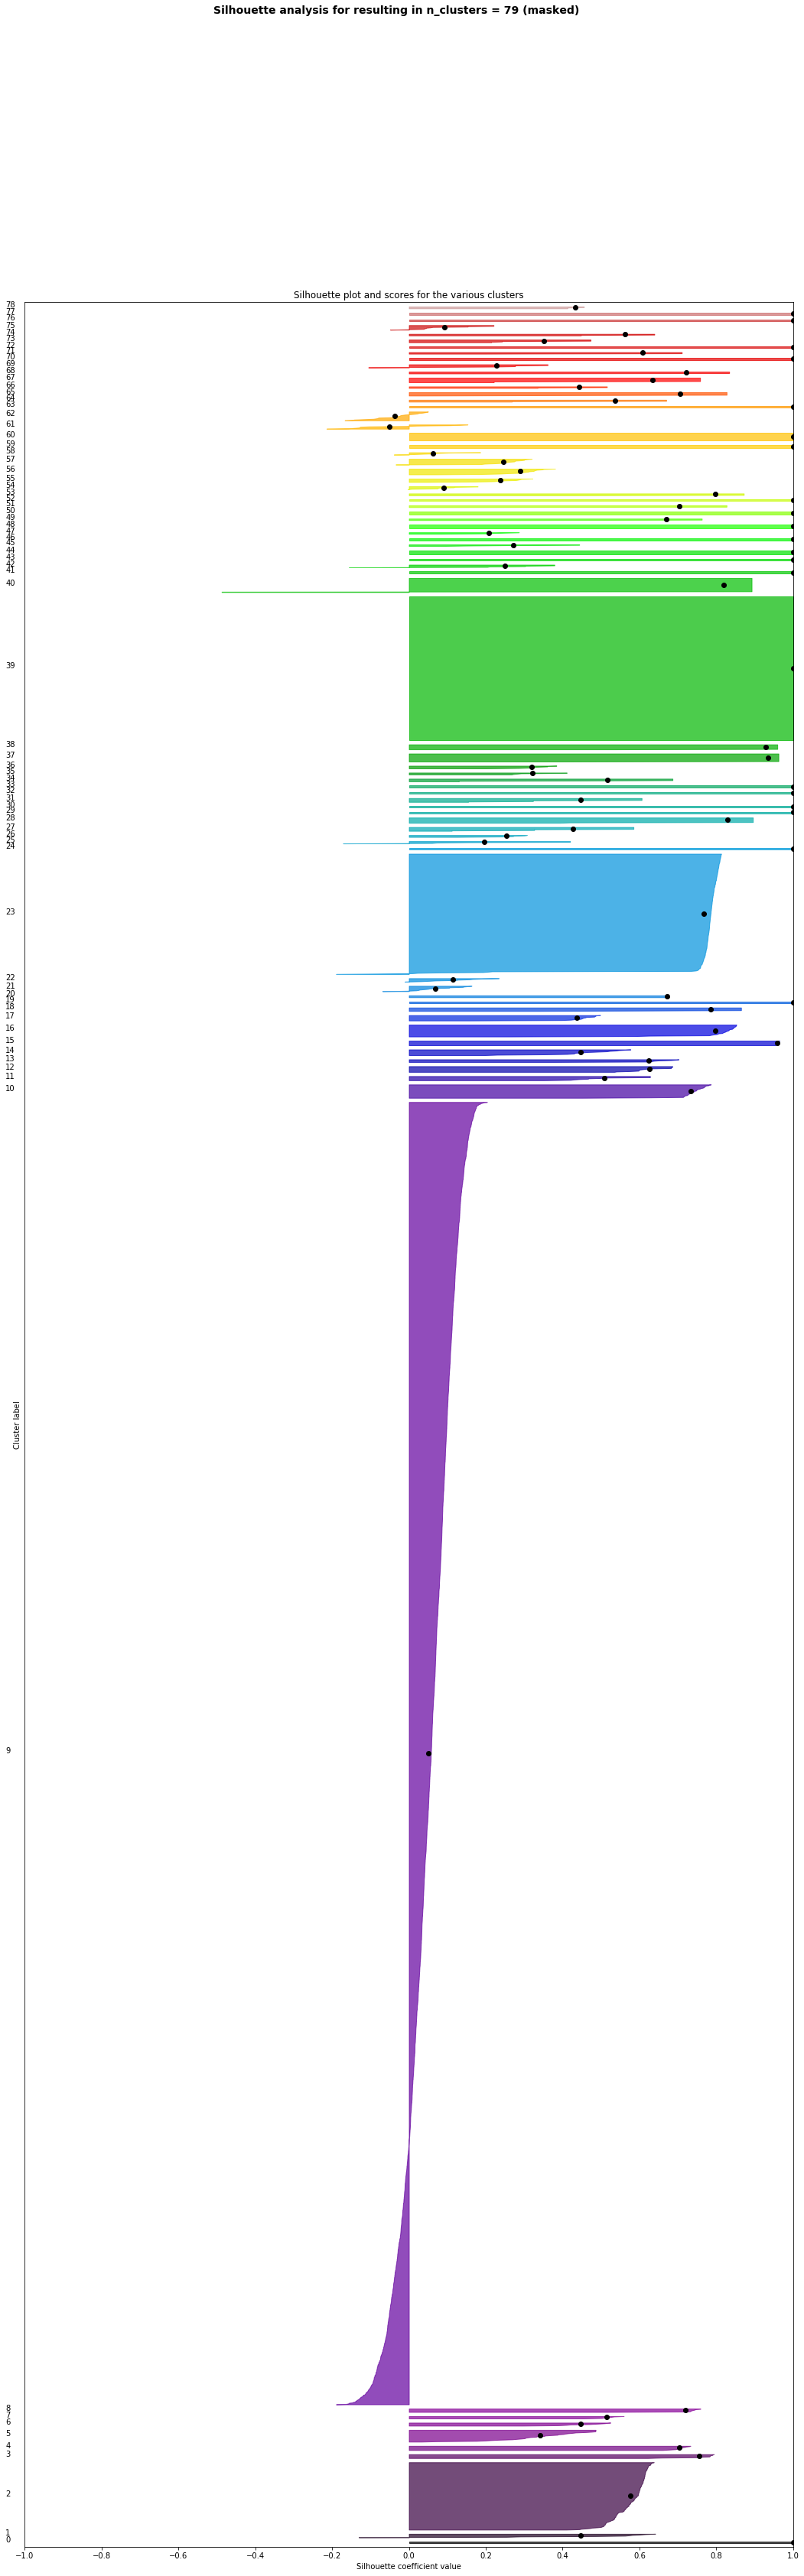

In [0]:
# Plot to get a sense of density and separation of the formed clusters
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Save the scores
X_masked['silhouette_score'] = sample_silhouette_values

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 54)
ax1.set_autoscaley_on(True)

# xlim -> silhouette coefficient range (unlikely negative in our case)
ax1.set_xlim([-1.0, 1.0])
ax1.set_ylim([0, len(X_masked) + (n_clusters + 1) * 10])

y_lower = 10
for i in mask:
    # Aggregate and sort to get a profile for cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Draw
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label
    ax1.text(-1.05, y_lower + 0.5 * size_cluster_i, str(i))

    # A dab at the average silhouette score for cluster i
    ax1.scatter(x=ith_cluster_silhouette_values.mean(), y=y_lower + 0.5 * size_cluster_i, color='k')
    
    # Compute the new y_lower for next cluster
    y_lower = y_upper + 10
    
ax1.set_title("Silhouette plot and scores for the various clusters")
ax1.set_xlabel("Silhouette coefficient value")
ax1.set_ylabel("Cluster label")
ax1.set_yticks([])  # clear
ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle(f"Silhouette analysis for resulting in n_clusters = {n_clusters} (masked)",
             fontsize=14, fontweight='bold')

plt.show()

In [0]:
# poke around to make sure it looks reasonable
def examine_cluster(cluster_num, num_rows_listed=5):
    cluster_num = cluster_num #pick your cluster - the triangular ones are the mad-libs
    cluster_to_check = X_masked[X_masked['cluster'] == cluster_num][['silhouette_score','text_data']].sort_values('silhouette_score')
    print(f'== TOP {num_rows_listed} SILHOUETTE SCORES ==')
    print(cluster_to_check.tail(5))
    print(f'\n== BOTTOM {num_rows_listed} SILHOUETTE SCORES ==')
    print(cluster_to_check.head(5))

In [0]:
examine_cluster(10)

== TOP 5 SILHOUETTE SCORES ==
      silhouette_score                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            text_data
4585          0.770886  Etsy Shop sunroomstudios\r\n\r\nChairman Pai's proposed plan to repeal net neutrality protections would put a huge burden on microbusinesses like mine.\r\n\r\nAs an Etsy seller, net neutrality is essential to the success of my business and my ability to care for myself and my family. The FCC needs to ensure equal opportunities for microbusinesses to compete with larger and more established brands by upholding net neutr